# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Marwan Hadid
- Email: mrwn.hadid@std.unissula.ac.id
- Id Dicoding: haadid

## Menentukan Pertanyaan Bisnis

- Pada hari apa jumlah penyewa tertinggi dan terendah?
- Bagaimana cuaca mempengaruhi penyewaan sepeda harian?
- Bagaimana pengaruh musim terhadap  penyewaan sepeda?
- Bagaimana pengaruh cuaca dan kelembapan terhadap  penyewaan sepeda?
- Bagaimana pengaruh musim dan cuaca terhadap penyewaan sepeda?
- Bagaimana pengaruh suhu terhadap penyewaan sepeda?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile as zf
import os

## Data Wrangling

### Gathering Data

In [2]:
url = "https://drive.google.com/u/0/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ&export=download"
response = requests.get(url)
filename = 'Bike-sharing-dataset'

# Mengecek keberhasilan request
if response.status_code == 200:
    with open(filename + '.zip', 'wb') as f:
        f.write(response.content)
    print('Berkas berhasil terunduh!')

    # Mengekstrak berkas zip
    with zf.ZipFile(filename + '.zip', 'r') as zip_ref:
        zip_ref.extractall(filename)

    print('Berkas berhasil diekstrak.')

else:
    print('Gagal mengunduh berkas.')


Berkas berhasil terunduh!
Berkas berhasil diekstrak.


In [3]:
file_list = []
for file in os.listdir(filename):
    if file.endswith('.csv'):
        file_list.append(file)

day_path = os.path.join(filename, file_list[0])
#hour_path = os.path.join(filename, file_list[1])

In [4]:
with open(filename + '/readme.txt', 'r') as txt:
    print(txt.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [5]:
day_df = pd.read_csv(day_path)
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
print('Jumlah duplikat: ', day_df.duplicated().sum())

Jumlah duplikat:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada readme dijelaskan terdapat 4 jenis cuaca namun hanya 3 yang tampil dalam data, min 1 dan max 3.

In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [11]:
# Menghapus kolom yang tidak perlu
day_df = day_df.drop(['instant', 'dteday', 'holiday'], axis=1)

In [12]:
day_categorical = [x for x in day_df.columns if len(day_df[x].unique()) < 13]
day_categorical

['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

In [13]:
# Mengganti nomor menjadi kategori
peta_musim = {1:'Semi', 2:'Panas', 3:'Gugur', 4:'Dingin'}
peta_tahun = {0:2011, 1:2012}
peta_cuaca = {1:'Cerah', 2:'Berawan', 3:'Gerimis'}
peta_bulan = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr' , 5:'Mei', 6:'Jun', 7:'Jul', 8:'Agu', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Des'}
peta_hari = {0:'Min', 1:'Sen', 2:'Sel', 3:'Rab', 4:'Kam', 5:'Jum', 6:'Sab'}
peta_hari_kerja = {0:'Libur' , 1:'Kerja'}

In [14]:
day_df['season'] = day_df['season'].replace(peta_musim)
day_df['yr'] = day_df['yr'].replace(peta_tahun)
day_df['weathersit'] = day_df['weathersit'].replace(peta_cuaca)
day_df['mnth'] = day_df['mnth'].replace(peta_bulan)
day_df['weekday'] = day_df['weekday'].replace(peta_hari)
day_df['workingday'] = day_df['workingday'].replace(peta_hari_kerja)

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   weekday     731 non-null    object 
 4   workingday  731 non-null    object 
 5   weathersit  731 non-null    object 
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  casual      731 non-null    int64  
 11  registered  731 non-null    int64  
 12  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.4+ KB


## Exploratory Data Analysis (EDA)

### Explore Bike-Sharing-Dataset

#### Univariate Analysis


In [16]:
day_df.describe(include='all')

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Gugur,NaN,Jan,Sab,Kerja,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,0.500342,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [17]:
day_df.groupby('workingday').cnt.sum().sort_values(ascending=False)

workingday
Kerja    2292410
Libur    1000269
Name: cnt, dtype: int64

- Penyewaan sepeda lebih banyak dihari kerja dibanding hari libur

In [18]:
day_df.groupby('weekday').cnt.sum().sort_values(ascending=False)

weekday
Jum    487790
Kam    485395
Sab    477807
Rab    473048
Sel    469109
Sen    455503
Min    444027
Name: cnt, dtype: int64

- Penyewaan terbanyak adalah hari jumat, bisa jadi karena jumatan

In [19]:
day_df.groupby('weathersit').cnt.sum().sort_values(ascending=False)

weathersit
Cerah      2257952
Berawan     996858
Gerimis      37869
Name: cnt, dtype: int64

- Penyewaan sepeda lebih banyak dicuaca cerah daripada berawan dan gerimis

In [20]:
day_df.groupby('yr').cnt.sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

- Dalam kurun waktu 2011 dan 2012, peminjam sepeda mengalami kenaikan

C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


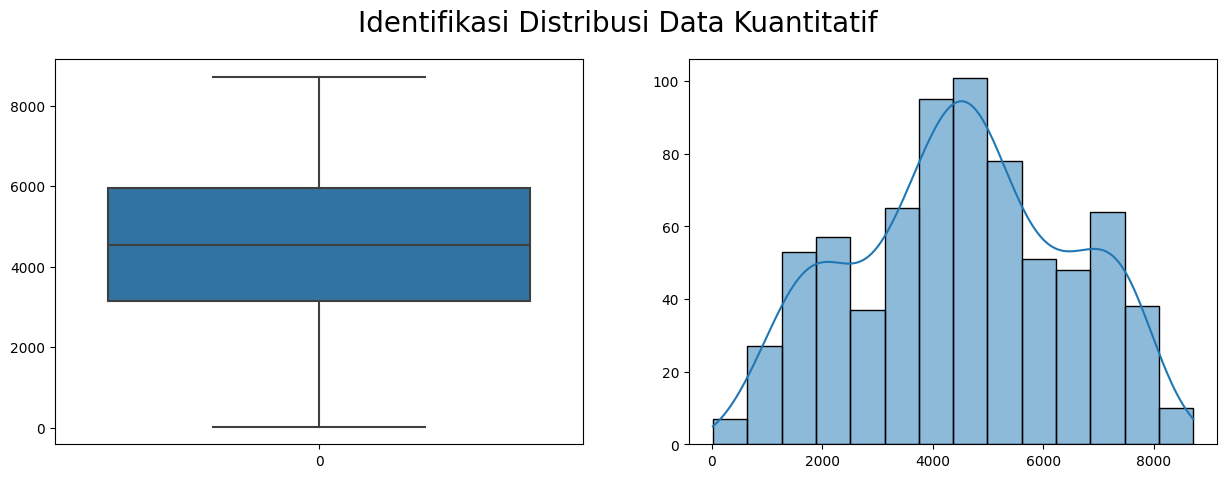

In [21]:
# Menganalisa distribusi normal
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

fig.suptitle('Identifikasi Distribusi Data Kuantitatif', fontsize=20)
sns.boxplot(day_df['cnt'], ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_xlabel('')
sns.histplot(day_df['cnt'], ax=ax[1], kde=True)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.show()

- Distribusi untuk kolom cnt terlihat seimbang
- Tidak ada outlier

In [22]:
non_cat = [col for col in day_df.select_dtypes(exclude='object').columns if col != 'cnt' and col != 'yr' and day_df.columns.nunique() > 3]

C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

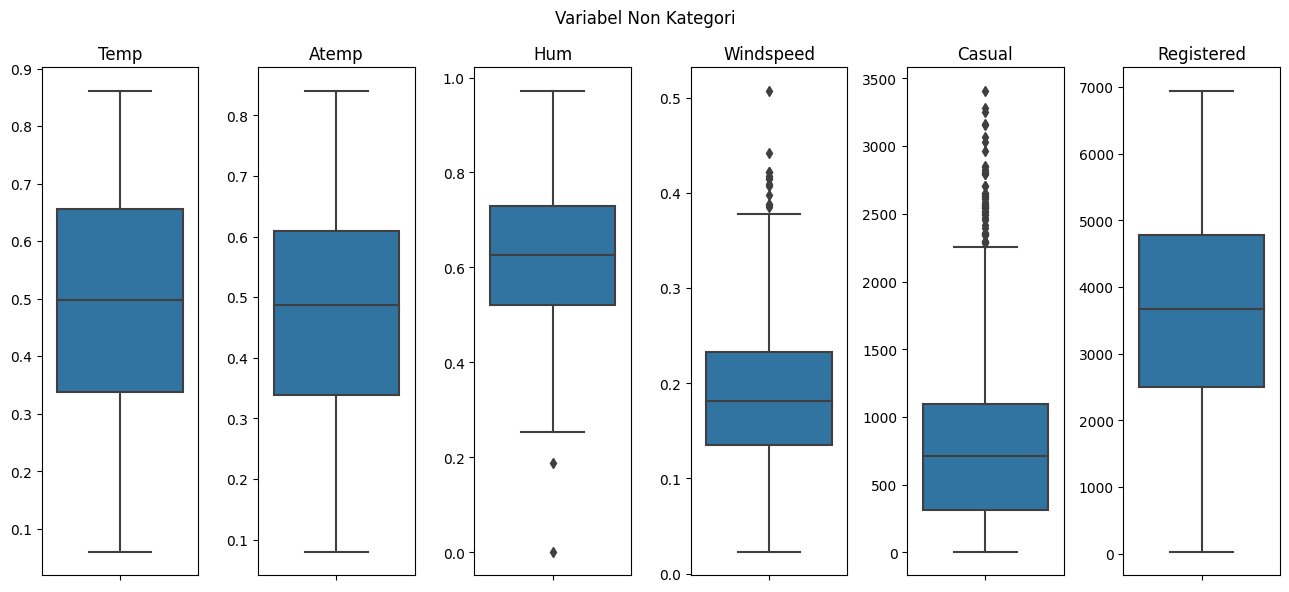

In [23]:
# Plot untuk non kategorikal
fig, ax = plt.subplots(nrows=1, ncols=len(non_cat), figsize=(13,6))

# judul plot
fig.suptitle('Variabel Non Kategori')

for i, col in enumerate(non_cat):
    sns.boxplot(day_df, y=col,  ax=ax[i])
    ax[i].set_title(col.capitalize())
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

- Distribusi data terlihat seimbang meskipun terdapat outlier dibeberapa variabel

C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

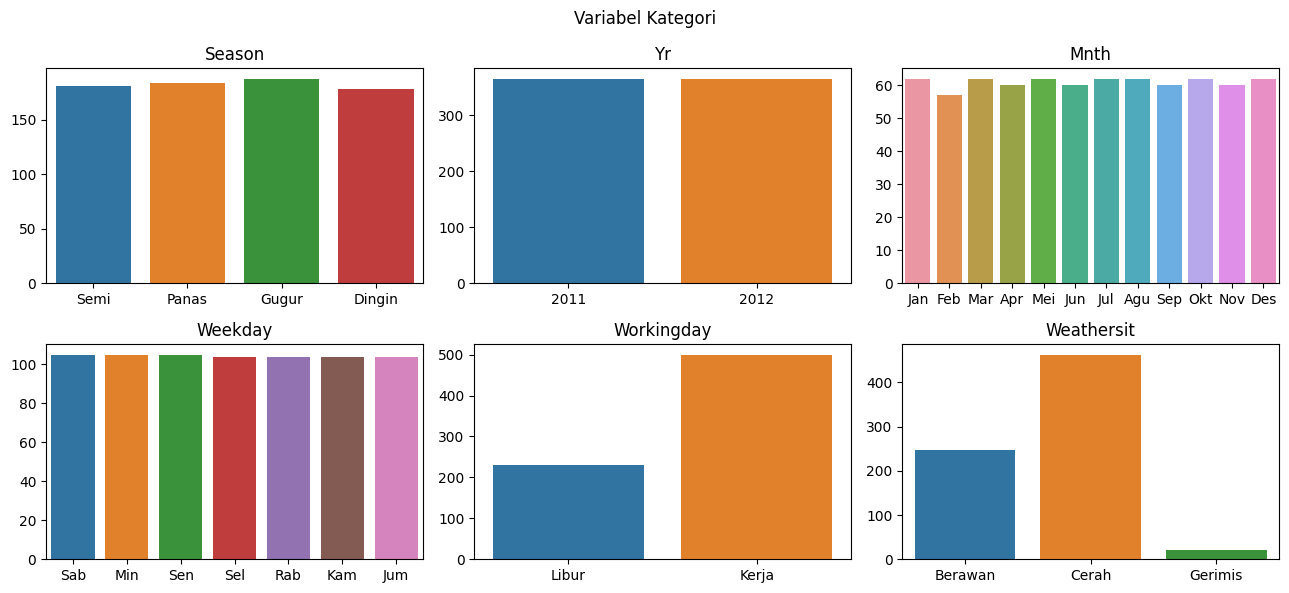

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=int((len(day_categorical))/2), figsize=(13,6))

# judul plot
fig.suptitle('Variabel Kategori')

for i, var in enumerate(day_categorical):
    row = i // 3
    col = i % 3
    sns.countplot(day_df, x=var, ax=ax[row, col])
    ax[row, col].set_title(var.capitalize())
    ax[row, col].set_ylabel('')
    ax[row, col].set_xlabel('')
    
plt.tight_layout()
plt.show()

- Penjelasan plot menunjukkan bahwa data seimbang kecuali pada cuaca

#### Multivariate Analysis

In [25]:
# Jumlah penyewaan harian pada tahun 2011 dan 2012
hari_dan_tahun_df = day_df.groupby(['yr','weekday']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).sort_values(by='cnt',ascending=False)

hari_dan_tahun_df

casual  registered     cnt
yr   weekday                            
2012 Kam       39020      271823  310843
     Jum       48785      256999  305784
     Rab       36659      267220  303879
     Sab       94305      203759  298064
     Sel       33854      254917  288771
     Sen       39224      236058  275282
     Min       80918      186035  266953
2011 Jum       29453      152553  182006
     Sel       23989      156349  180338
     Sen       31560      148661  180221
     Sab       59547      120196  179743
     Min       59603      117471  177074
     Kam       22440      152112  174552
     Rab       20660      148509  169169

In [26]:
# Mengecek berdasarkan musim
musim_df = day_df.groupby(by=['season']).agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'cnt' : 'mean'
}).sort_values(by='cnt', ascending=True)
musim_df

,casual,registered,cnt
season,,,
Semi,334.928177,2269.204420,2604.132597
Dingin,729.112360,3999.050562,4728.162921
Panas,1106.097826,3886.233696,4992.331522
Gugur,1202.611702,4441.691489,5644.303191


C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

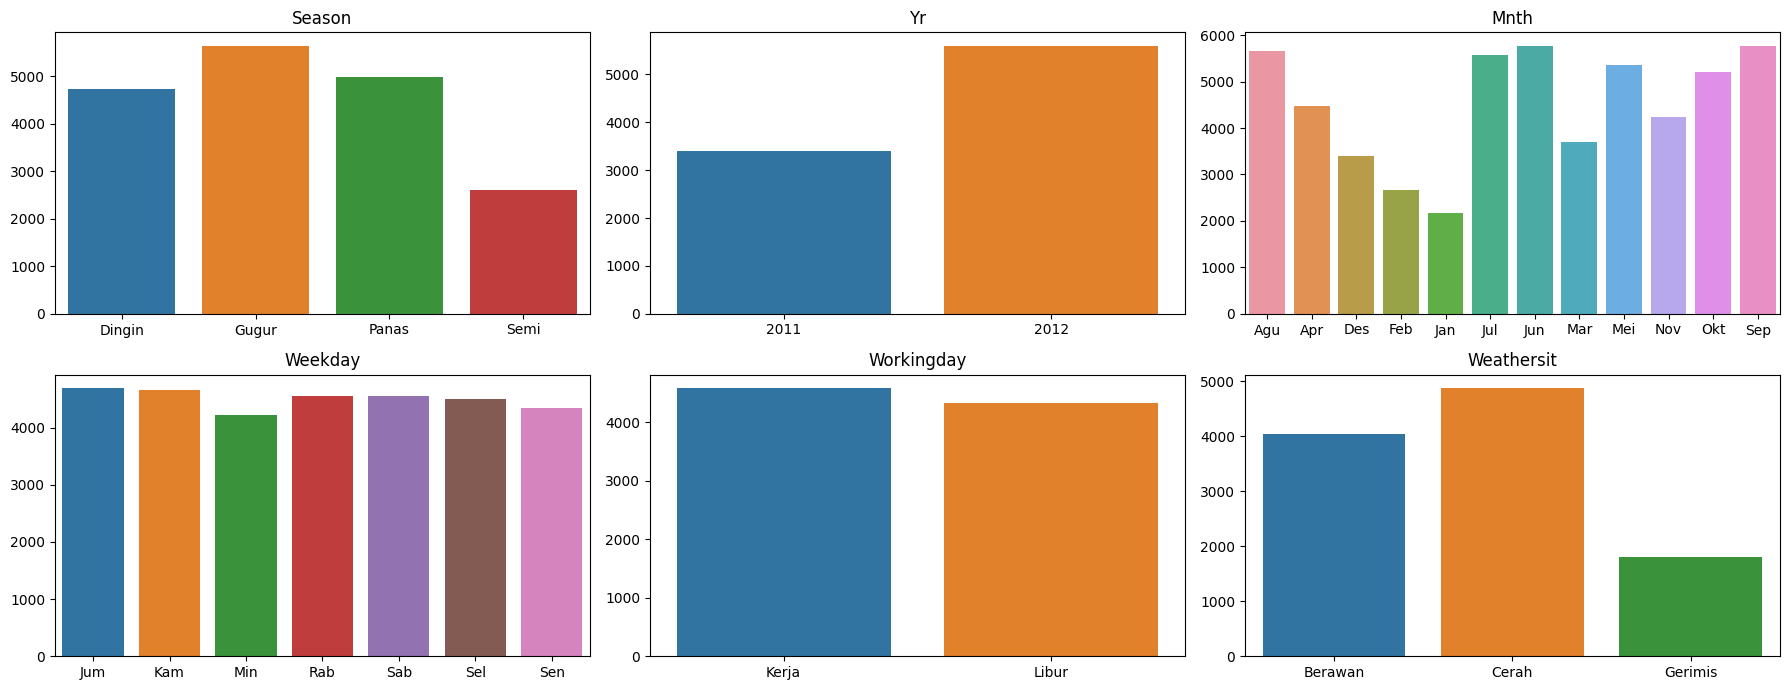

In [27]:
# Membuat plot hubungan antara variabel kategori dengan total penyewaan
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,7))

for i, var in enumerate(day_categorical):
    df_sorted = day_df.groupby(by=var).agg({'cnt':'mean'})
    row = i // 3
    col = i % 3
    sns.barplot(data=df_sorted, x=df_sorted.index, y='cnt', ax=ax[row, col])
    
    # Menambahkan label dan judul
    ax[row, col].set_title(var.capitalize())
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('')

plt.tight_layout()
plt.show()

In [28]:
bulan_df = day_df.groupby(by=['mnth']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).sort_values(by='cnt', ascending=False)
bulan_df

,casual,registered,cnt
mnth,,,
Agu,72039,279155,351194
Jun,73906,272436,346342
Sep,70323,275668,345991
Jul,78157,266791,344948
Mei,75285,256401,331686
Okt,59760,262592,322352
Apr,60802,208292,269094
Nov,36603,218228,254831
Mar,44444,184476,228920


In [29]:
musim_dan_cuaca_df = day_df.groupby(by=['season','weathersit'], as_index=False).agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'cnt' : 'mean'
}).sort_values('season', ascending=False)
musim_dan_cuaca_df

,season,weathersit,casual,registered,cnt
9,Semi,Berawan,284.530303,2072.636364,2357.166667
10,Semi,Cerah,374.432432,2436.702703,2811.135135
11,Semi,Gerimis,70.250000,864.500000,934.750000
6,Panas,Berawan,834.029412,3402.676471,4236.705882
7,Panas,Cerah,1295.469027,4253.079646,5548.548673
8,Panas,Gerimis,140.000000,1029.000000,1169.000000
3,Gugur,Berawan,1175.145833,4047.333333,5222.479167
4,Gugur,Cerah,1234.889706,4643.367647,5878.257353
5,Gugur,Gerimis,434.750000,2317.000000,2751.750000
0,Dingin,Berawan,582.707692,4071.292308,4654.000000


C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

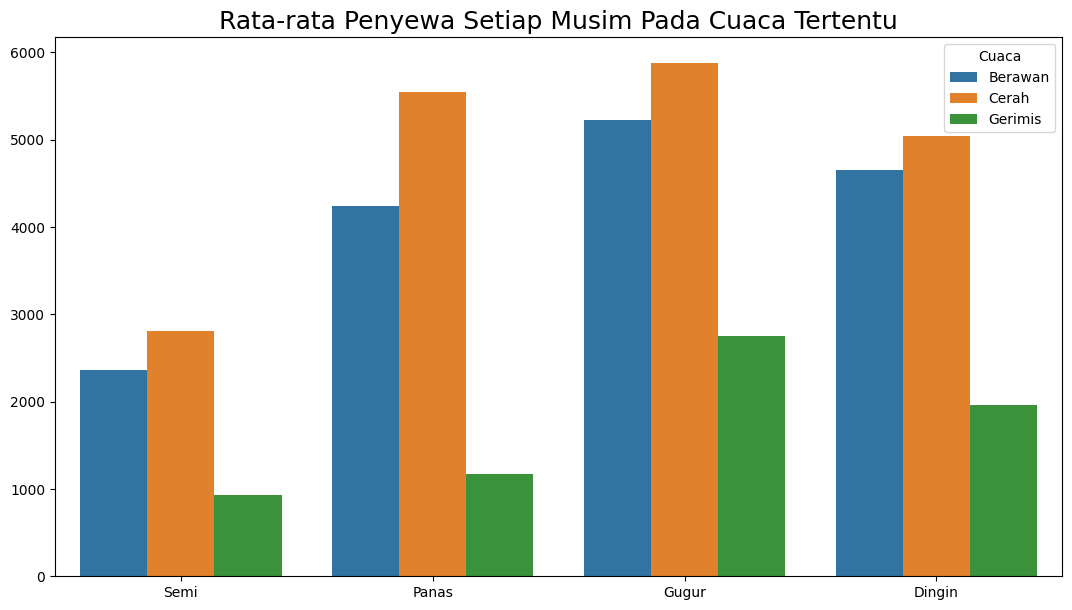

In [30]:
# Membuat plot jumlah pinjaman dalam cuaca tertentu setiap musimnya
plt.figure(figsize=(13,7))

sns.barplot(data=musim_dan_cuaca_df, x='season', y='cnt', hue='weathersit')
plt.title('Rata-rata Penyewa Setiap Musim Pada Cuaca Tertentu', fontsize=18)
plt.legend(title='Cuaca')
plt.xlabel('')
plt.ylabel('')

plt.show()

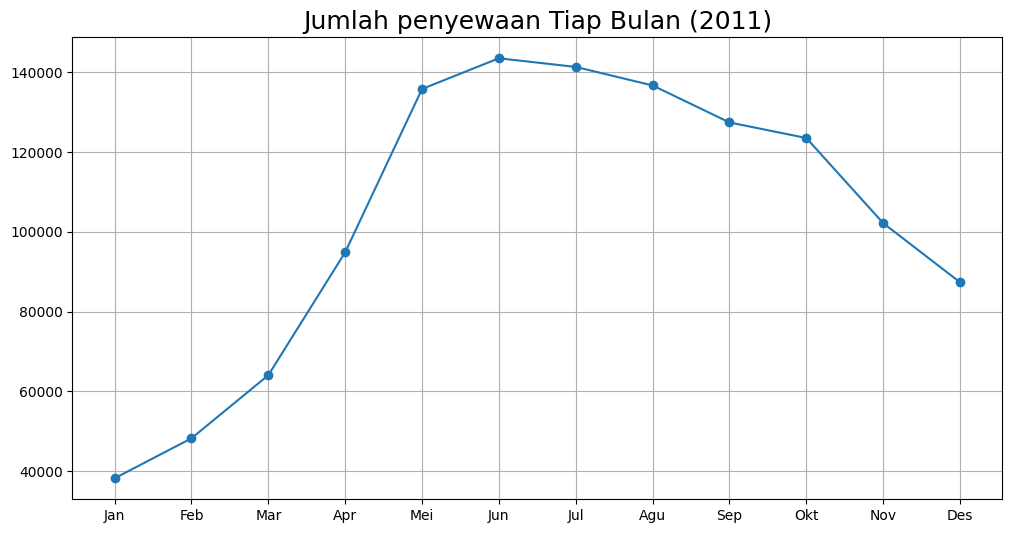

In [31]:
# Plot penyewaan tahun 2011
bulan_urut = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']

data_2011 = day_df[day_df['yr'] == 2011]
data_2011 = data_2011.groupby('mnth')['cnt'].sum()
data_2011 = data_2011.reindex(bulan_urut)

# Membuat line plot dari jumlah penyewa tiap bulan yang sudah diurutkan
plt.figure(figsize=(12, 6))
plt.plot(data_2011.index, data_2011.values, marker='o', linestyle='-')
plt.title('Jumlah penyewaan Tiap Bulan (2011)', fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

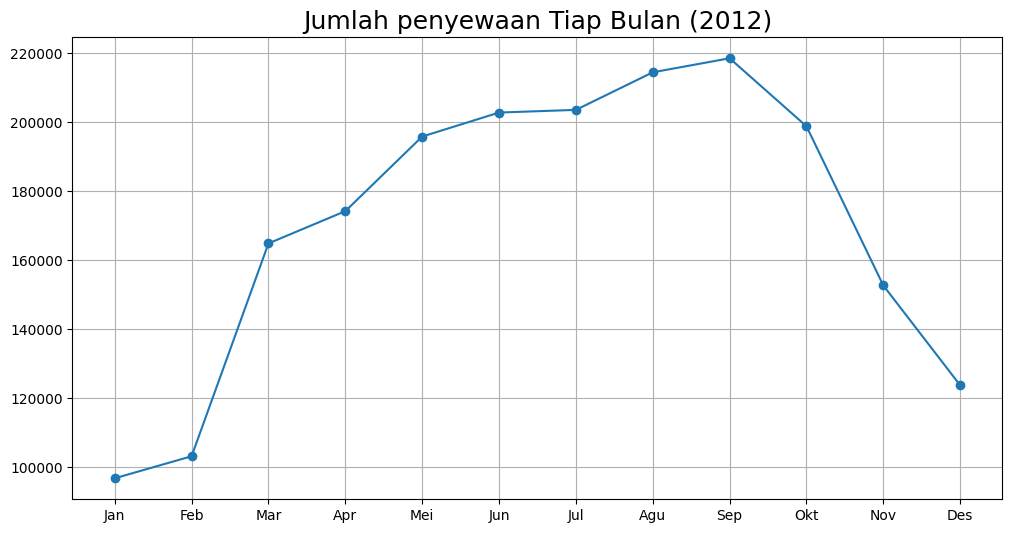

In [32]:
# Plot penyewaan tahun 2012
data_2012 = day_df[day_df['yr'] == 2012]
data_2012 = data_2012.groupby('mnth')['cnt'].sum()
data_2012 = data_2012.reindex(bulan_urut)

# Membuat line plot dari jumlah penyewa tiap bulan yang sudah diurutkan
plt.figure(figsize=(12, 6))
plt.plot(data_2012.index, data_2012.values, marker='o', linestyle='-')
plt.title('Jumlah penyewaan Tiap Bulan (2012)', fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

In [33]:
bulan_dan_tahun_df = day_df.groupby(by=['yr','mnth']).agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'cnt' : 'mean'
}).sort_values(by='cnt', ascending=False).reset_index()
bulan_dan_tahun_df

,yr,mnth,casual,registered,cnt
0,2012,Sep,1459.266667,5826.500000,7285.766667
1,2012,Agu,1393.451613,5526.000000,6919.451613
2,2012,Jun,1443.133333,5317.866667,6761.000000
3,2012,Jul,1345.322581,5222.645161,6567.967742
4,2012,Okt,1114.129032,5300.096774,6414.225806
5,2012,Mei,1426.935484,4891.290323,6318.225806
6,2012,Apr,1281.866667,4525.600000,5807.466667
7,2012,Mar,1019.935484,4298.612903,5318.548387
8,2012,Nov,700.300000,4388.500000,5088.800000
9,2011,Jun,1020.400000,3763.333333,4783.733333


C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

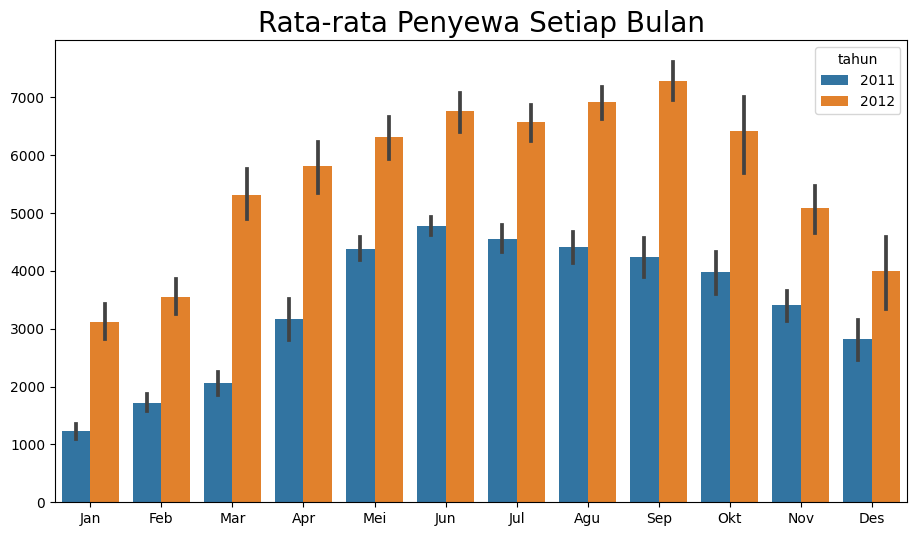

In [34]:
plt.figure(figsize=(11,6))

sns.barplot(data=day_df, x='mnth', y='cnt', hue='yr')
plt.title('Rata-rata Penyewa Setiap Bulan', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='tahun')
plt.show()

In [35]:
new_day_df = pd.read_csv(day_path)

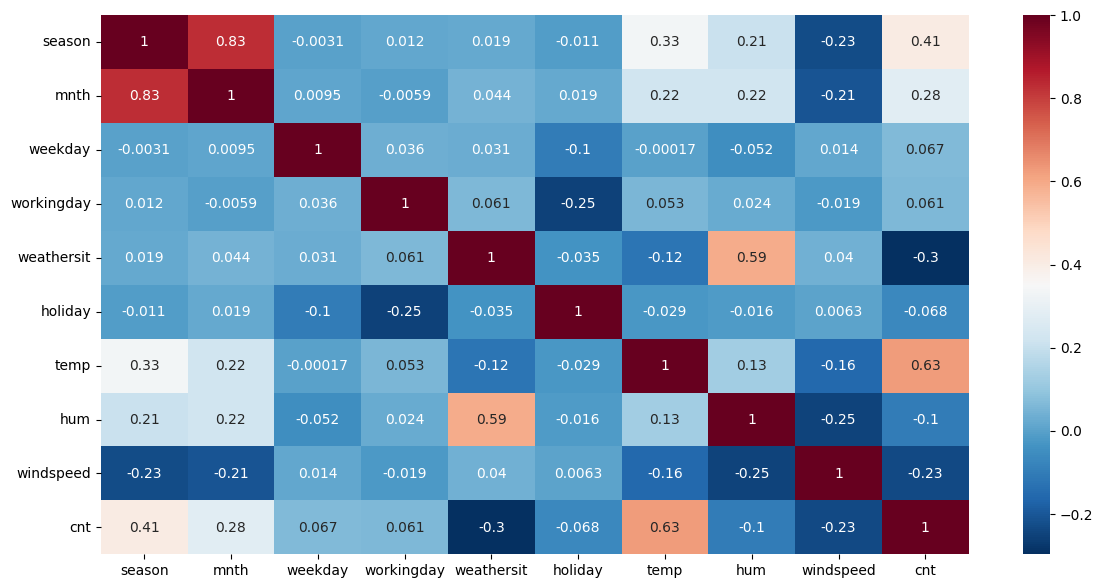

In [36]:
plt.figure(figsize=(14, 7))
sns.heatmap(new_day_df[['season','mnth','weekday','workingday','weathersit',
                        'holiday','temp','hum','windspeed','cnt']].corr(), annot=True, cmap='RdBu_r')
plt.show()

- Temperatur dan jumlah penyewaan memiliki nilai korelasi
- Kelembapan dan cuaca memiliki nilai korelasi tetapi kecil

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

In [37]:
hari_df = day_df.groupby('weekday').agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'cnt' : 'mean'
}).sort_values(by='weekday').reset_index()

hari_df

,weekday,casual,registered,cnt
0,Jum,752.288462,3938.000000,4690.288462
1,Kam,590.961538,4076.298077,4667.259615
2,Min,1338.295238,2890.533333,4228.828571
3,Rab,551.144231,3997.394231,4548.538462
4,Sab,1465.257143,3085.285714,4550.542857
5,Sel,556.182692,3954.480769,4510.663462
6,Sen,674.133333,3663.990476,4338.123810


C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


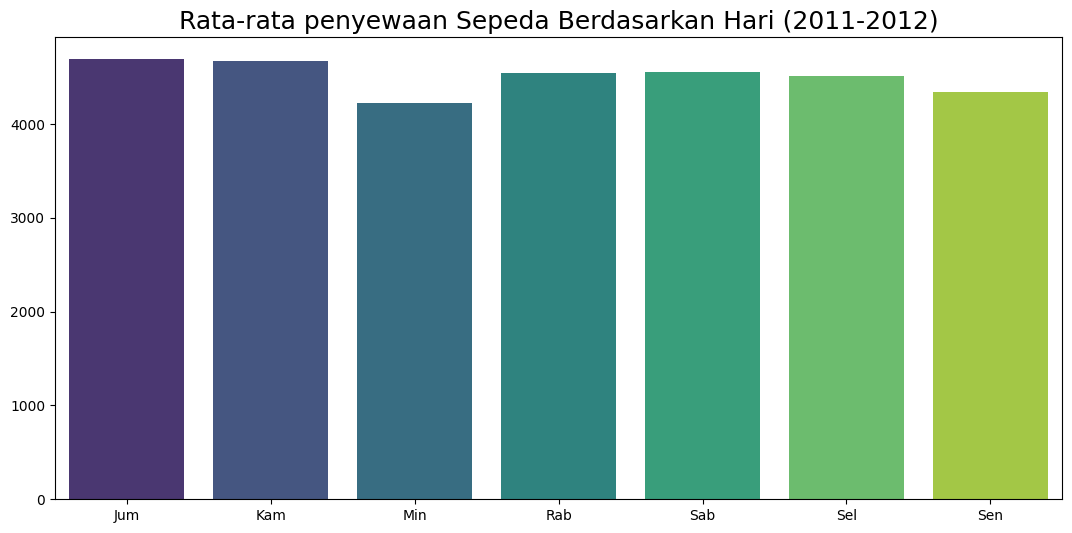

In [38]:
plt.figure(figsize=(13, 6))
sns.barplot(data=hari_df, x='weekday', y='cnt', palette='viridis')
plt.title('Rata-rata penyewaan Sepeda Berdasarkan Hari (2011-2012)', fontsize=18)
plt.ylabel('')
plt.xlabel('')
plt.show()

- Penyewa terbanyak adalah hari jumat, bisa jadi karena ada jumatan, meskipun berbeda tipis dari hari kamis. Sementara hari minggu adalah yang terendah, sebab hari minggu termasuk akhir pekan yang berarti libur.


### Pertanyaan 2: 

In [39]:
cuaca_df = day_df.groupby('weathersit', as_index=False).agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'cnt' : 'mean',
})

cuaca_df

,weathersit,casual,registered,cnt
0,Berawan,687.352227,3348.510121,4035.862348
1,Cerah,964.030238,3912.755940,4876.786177
2,Gerimis,185.476190,1617.809524,1803.285714


C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


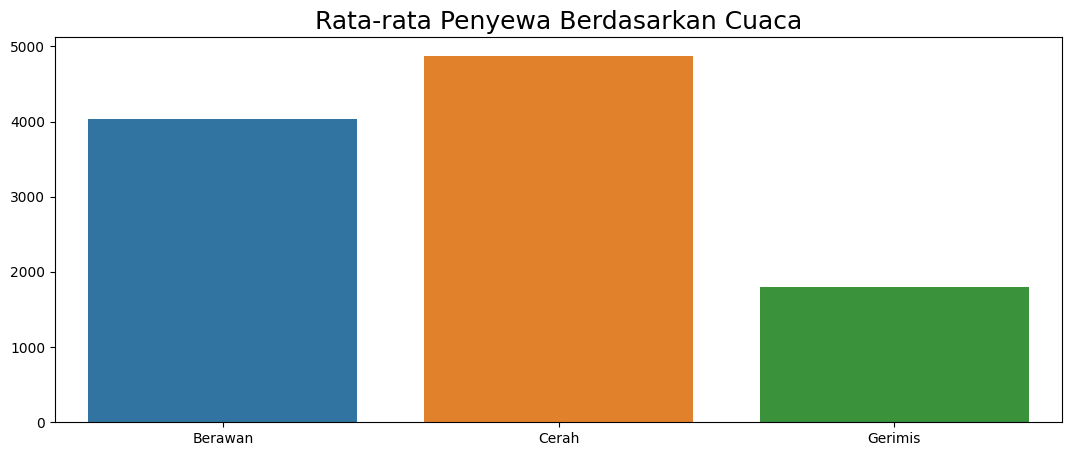

In [40]:
plt.figure(figsize=(13,5))

sns.barplot(data=cuaca_df, x='weathersit', y='cnt')
plt.title('Rata-rata Penyewa Berdasarkan Cuaca', fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.show()

- Pada kondisi cuaca cerah, rata-rata penyewa mencapai puncak, disusul cuaca berawan yang selisihnya tidak terlalu besar. Sedangkan pada cuaca gerimis, penyewa mengalami penurunan yang cukup jauh dari saat kondisi cerah.

### Pertanyaan 3: 

In [41]:
musim_df = day_df.groupby(by=['season'], as_index=False).agg({
    'cnt' : 'mean'
}).sort_values('season', ascending=False)

C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


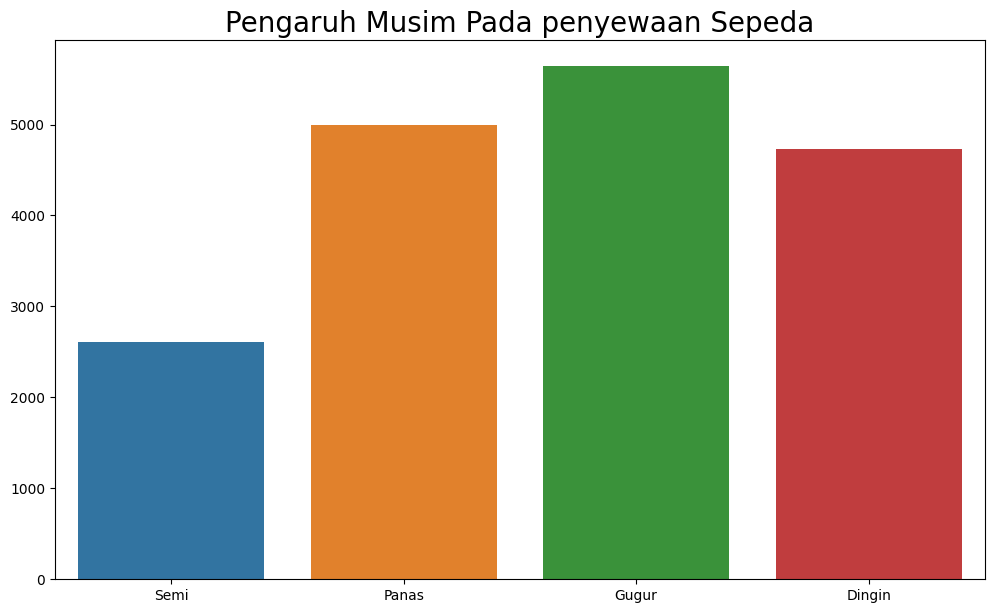

In [42]:
plt.figure(figsize=(12, 7))
sns.barplot(data=musim_df, x='season', y='cnt')
plt.title('Pengaruh Musim Pada penyewaan Sepeda', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

- Musim gugur menjadi musim dengan penyewa terbanyak. Diikuti musim panas dan dingin yang memiliki selisih yang kecil, walaupun kedua musim ini mempunyai suhu yang tidak normal. Penyewa sepeda paling sedikit beda pada musim semi.

### Pertanyaan 4: 

C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


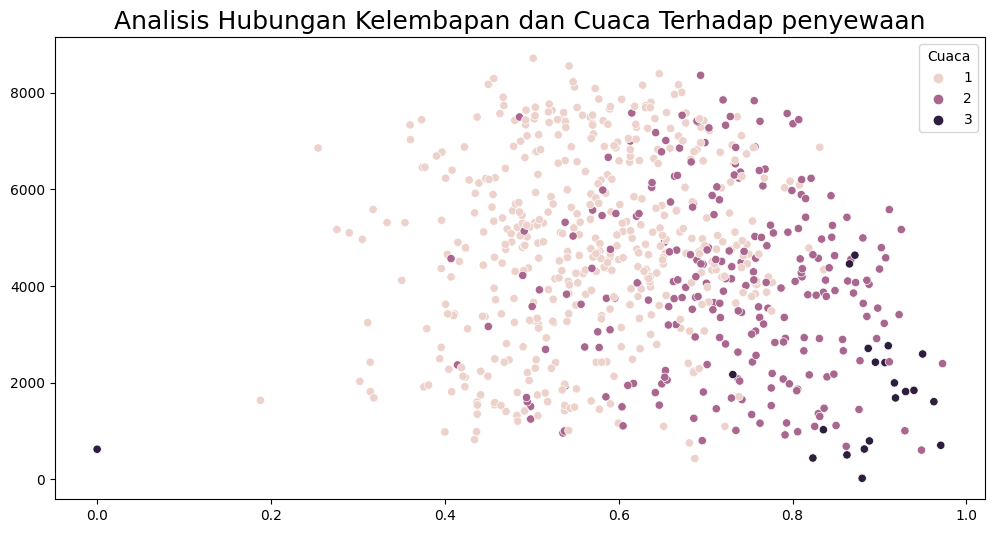

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=new_day_df, x='hum', y='cnt', hue='weathersit')
plt.title('Analisis Hubungan Kelembapan dan Cuaca Terhadap penyewaan', fontsize=18)
plt.legend(title='Cuaca', loc='upper right')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Pertanyaan 5

In [44]:
musim_dan_cuaca_df

,season,weathersit,casual,registered,cnt
9,Semi,Berawan,284.530303,2072.636364,2357.166667
10,Semi,Cerah,374.432432,2436.702703,2811.135135
11,Semi,Gerimis,70.250000,864.500000,934.750000
6,Panas,Berawan,834.029412,3402.676471,4236.705882
7,Panas,Cerah,1295.469027,4253.079646,5548.548673
8,Panas,Gerimis,140.000000,1029.000000,1169.000000
3,Gugur,Berawan,1175.145833,4047.333333,5222.479167
4,Gugur,Cerah,1234.889706,4643.367647,5878.257353
5,Gugur,Gerimis,434.750000,2317.000000,2751.750000
0,Dingin,Berawan,582.707692,4071.292308,4654.000000


C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

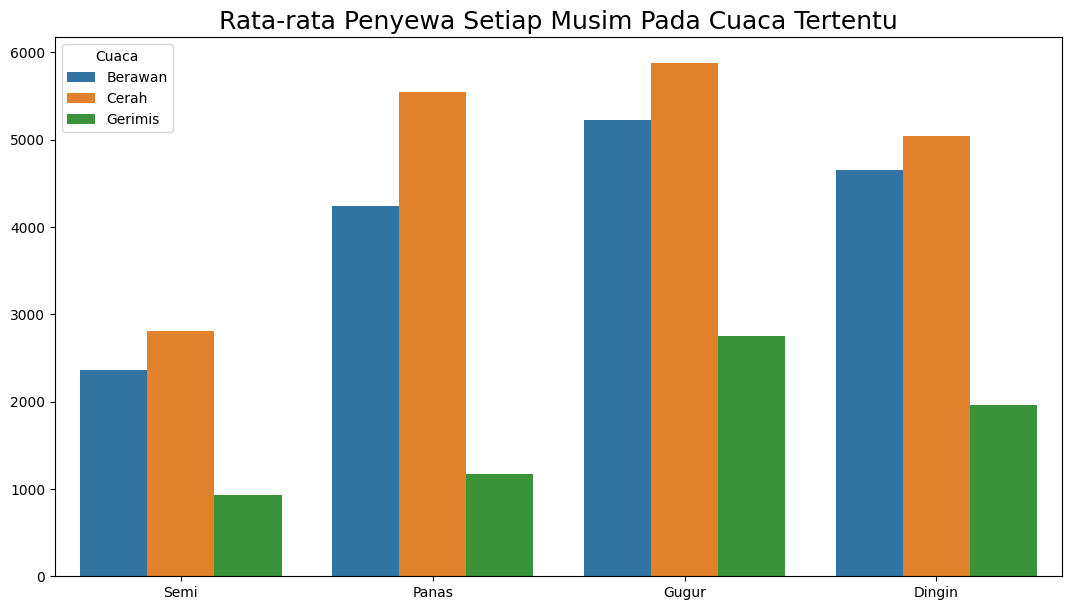

In [45]:
# Membuat plot jumlah pinjaman dalam cuaca tertentu setiap musimnya
plt.figure(figsize=(13,7))

sns.barplot(data=musim_dan_cuaca_df, x='season', y='cnt', hue='weathersit')
plt.title('Rata-rata Penyewa Setiap Musim Pada Cuaca Tertentu', fontsize=18)
plt.legend(title='Cuaca', loc='upper left')
plt.xlabel('')
plt.ylabel('')

plt.show()

### Pertanyaan 6

C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrwnh\.virtualenvs\lat_analisis_data--ghOnpvG\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


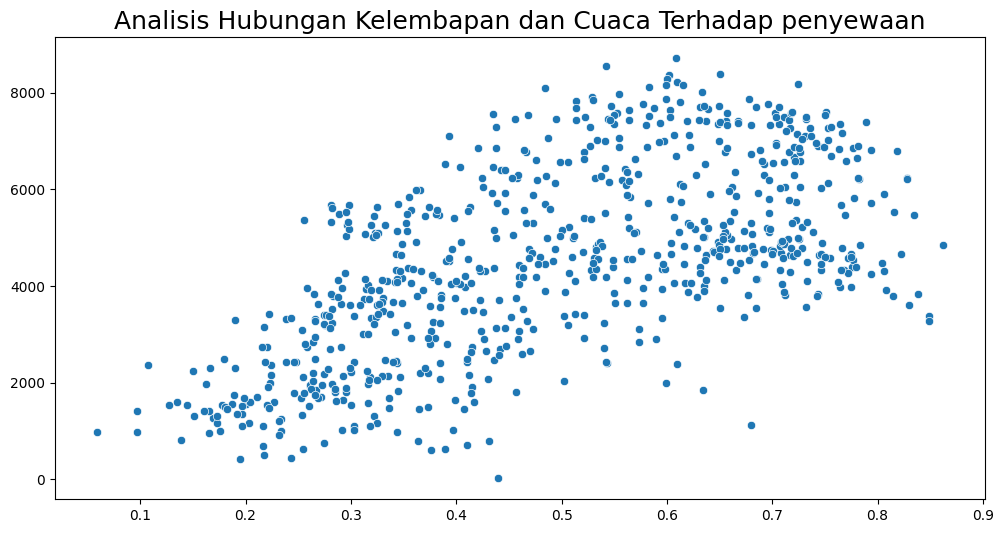

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=new_day_df, x='temp', y='cnt')
plt.title('Analisis Hubungan Kelembapan dan Cuaca Terhadap penyewaan', fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.show()

- Ada kemungkinan untuk menghitung regresi linear pada hubungan kelembapan dan jumlah penyewaan sepeda

In [47]:
# Menghitung regresi linier
X = new_day_df['temp']
Y = new_day_df['cnt'] 

In [48]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [49]:
b = np.sum((X - mean_X) * (Y - mean_Y)) / np.sum((X - mean_X) ** 2)

# Hitung intercept
a = mean_Y - b * mean_X

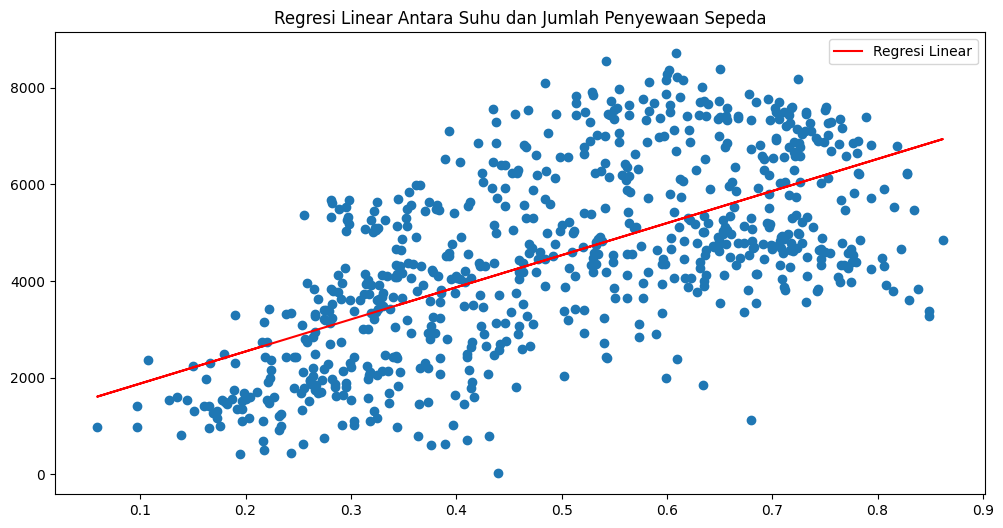

In [50]:
# Menampilkan plot
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(X,Y)

Y_pred = a + b * X
ax.plot(X, Y_pred, color='red', label='Regresi Linear')
ax.set_title('Regresi Linear Antara Suhu dan Jumlah Penyewaan Sepeda')
ax.set_ylabel('')
ax.set_xlabel('')

ax.legend()
plt.show()

## Conclusion

- Penyewa terbanyak adalah hari jumat dan hari minggu adalah yang terendah.
- Penyewa terbanyak pada cuaca cerah, disusul, berawan, kemudian gerimis.
- Musim gugur menjadi musim dengan penyewa terbanyak. Kemudian musim panas dan dingin yang memiliki selisih yang kecil. Dan paling musim semi.
- Kelembapan dan cuaca memiliki pengaruh kecil terhadap penyewaan sepeda. Namun terlihat ada pola pengelompokan pada plot.
- Musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan yang terlihat pada selilih antara musim gugur dan musim semi yang besar. Cuaca juga berpengaruh besar pada penyewaan sepeda. Pada cuaca cerah, jumlah penyewaan sepeda lebih banyak dibandingkan cuca berawan, yang kemudian disusul oleh cuaca gerimis. Pada musim tertentu, cuaca akan menjadi lebih ekstrim dari yang biasanya, seperti pada cuaca gerimis dimusim panas dan musim gugur. Terlihat bahwa penyewaan pada musim panas dicuaca gerimis lebih sedikit daripada cuaca gerimis dimusim gugur.
- Suhu sebagai variabel independen dan jumlah penyewa sepeda sebagai variabel dependen memiliki hubungan linier meskipun tidak besar dan masih banyak faktor yang mempengaruhi.